# Étape 1 - Exploration des données & DataViz’

### Importation des libraires nécessaires

In [1]:
# Importation des bibliothèques nécessaires

import os                                               # Pour interagir avec le système de fichiers, par exemple, accéder aux chemins des fichiers et dossiers
from pathlib import Path                                # Pour manipuler les chemins de fichiers et de répertoires de manière flexible et indépendante du système d'exploitation
import pandas as pd                                     # Pour la manipulation et l'analyse des données en utilisant des DataFrames
import numpy as np                                      # Pour les opérations mathématiques et la manipulation des tableaux
import matplotlib.pyplot as plt                         # Pour créer des graphiques et visualiser des données
import seaborn as sns                                   # Pour créer des visualisations statistiques plus élaborées (basé sur matplotlib)
import cv2                                              # Pour la manipulation d'images, notamment pour des tâches telles que la lecture, l'écriture, et la transformation des images
from sklearn.model_selection import train_test_split    #Pour séparer les données de test et de train

### Chargement du fichier et exploration des données

In [2]:
# Définir le répertoire de base du projet
project_dir = Path().resolve().parent

# Construire le chemin vers le fichier CSV
csv_path = project_dir / "data" / "dataframe_plant_disease_id.csv"

# Chargement du fichier 'dataframe_plant_disease_id.csv' dans un DataFrame df et visualisation des données
df = pd.read_csv(csv_path)
df.head()

chemin  hauteur  largeur    espèce  couleur état
0  ./semis/Cleavers/348.png      450      450  Cleavers      0.0  NaN
1  ./semis/Cleavers/176.png      295      295  Cleavers      0.0  NaN
2   ./semis/Cleavers/88.png      299      299  Cleavers      0.0  NaN
3  ./semis/Cleavers/162.png      194      194  Cleavers      0.0  NaN
4  ./semis/Cleavers/189.png      438      438  Cleavers      0.0  NaN

Description des différentes colonnes : 
- chemin : chemin de l'image dans les fichiers
- hauteur : hauteur de l'image en pixel
- largeur : largeur de l'image en pixel
- espèce : espèce de la plante
- couleur : booléen correspondant à 0 = image RGB et 1 = image segmented (sans fond)
- état : état de la plante. Prend soit : la valeur 'healthy' si la plante est saine, soit les valeurs correspondants aux noms de la maladie présente 'Black_rot', 'Early_blight', 'Target_Spot', 'Late_blight', 'Tomato_mosaic_virus', 'Haunglongbing_(Citrus_greening)', 'Leaf_Mold', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Powdery_mildew', 'Cedar_apple_rust', 'Bacterial_spot', 'Common_rust_', 'Esca_(Black_Measles)', 'Tomato_Yellow_Leaf_Curl_Virus', 'Apple_scab', 'Northern_Leaf_Blight', 'Spider_mites Two-spotted_spider_mite', 'Septoria_leaf_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Leaf_scorch'

#### Inspection des données

In [3]:
# Caractéristiques du DataFrame

print(df.info(), end="\n\n")

print(df.describe(), end="\n\n")

print("Taille du DataFrame", df.shape, end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59845 entries, 0 to 59844
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   chemin   59845 non-null  object 
 1   hauteur  59845 non-null  int64  
 2   largeur  59845 non-null  int64  
 3   espèce   59845 non-null  object 
 4   couleur  59845 non-null  float64
 5   état     54306 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB
None

            hauteur       largeur       couleur
count  59845.000000  59845.000000  59845.000000
mean     265.191261    265.160097      0.907444
std       94.272690     93.551838      0.289811
min       49.000000     49.000000      0.000000
25%      256.000000    256.000000      1.000000
50%      256.000000    256.000000      1.000000
75%      256.000000    256.000000      1.000000
max     3652.000000   3457.000000      1.000000

Taille du DataFrame (59845, 6)



In [4]:
# Vérification des duplicatats

print(df.duplicated(), end='\n\n')

longueur_initiale = len(df)

nb_lignes_dupliquees = df.duplicated().sum()

print("Nombre de lignes dupliquées:", nb_lignes_dupliquees)

0        False
1        False
2        False
3        False
4        False
         ...  
59840    False
59841    False
59842    False
59843    False
59844    False
Length: 59845, dtype: bool

Nombre de lignes dupliquées: 0


Nombre de valeurs manquantes par colonne :
 chemin        0
hauteur       0
largeur       0
espèce        0
couleur       0
état       5539
dtype: int64

Pourcentage de valeurs manquantes dans la colonne 'état' : 9.26 %


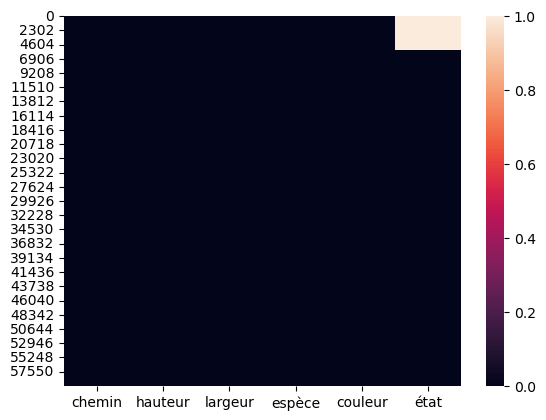

In [5]:
# Vérification des valeurs manquantes

print("Nombre de valeurs manquantes par colonne :\n",df.isna().sum(), end='\n\n')

sns.heatmap(df.isna())

# Calculer le pourcentage de valeurs manquantes dans le DataFrame
valeurs_manquantes_etat = df['état'].isna().sum()
valeurs_manquantes_etat_pourcent = round(((valeurs_manquantes_etat / len(df)) * 100),2)
print("Pourcentage de valeurs manquantes dans la colonne 'état' :", valeurs_manquantes_etat_pourcent, "%")


Nous remarquons que nous avons 5539 valeurs manquantes dans la catégorie 'état'. Il s'agit des images provenant du dataset https://www.kaggle.com/datasets/vbookshelf/v2-plant-seedlings-dataset dont les images ne disposent pas de cette donnée. 

#### DataViz'

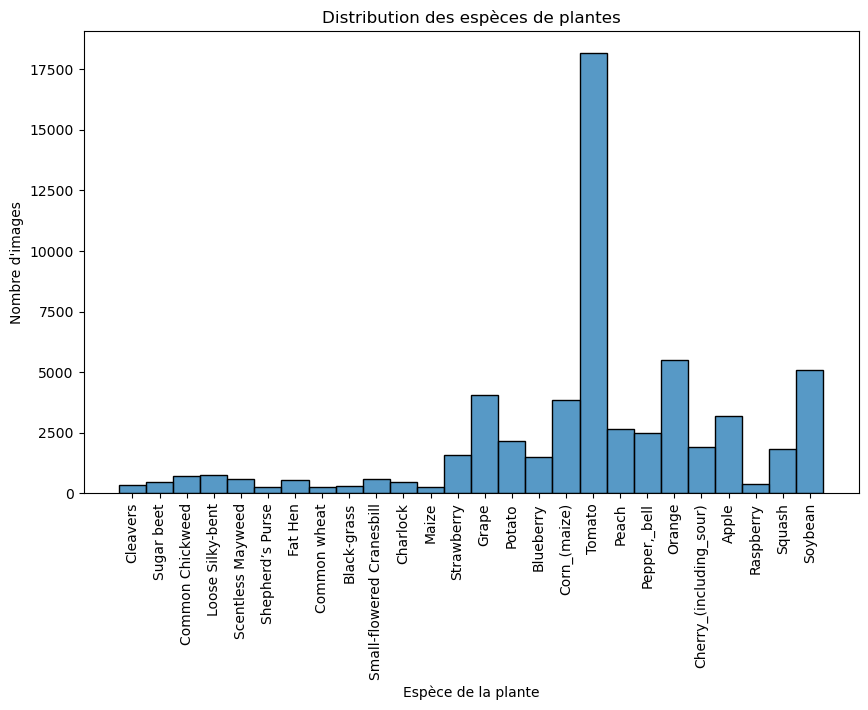

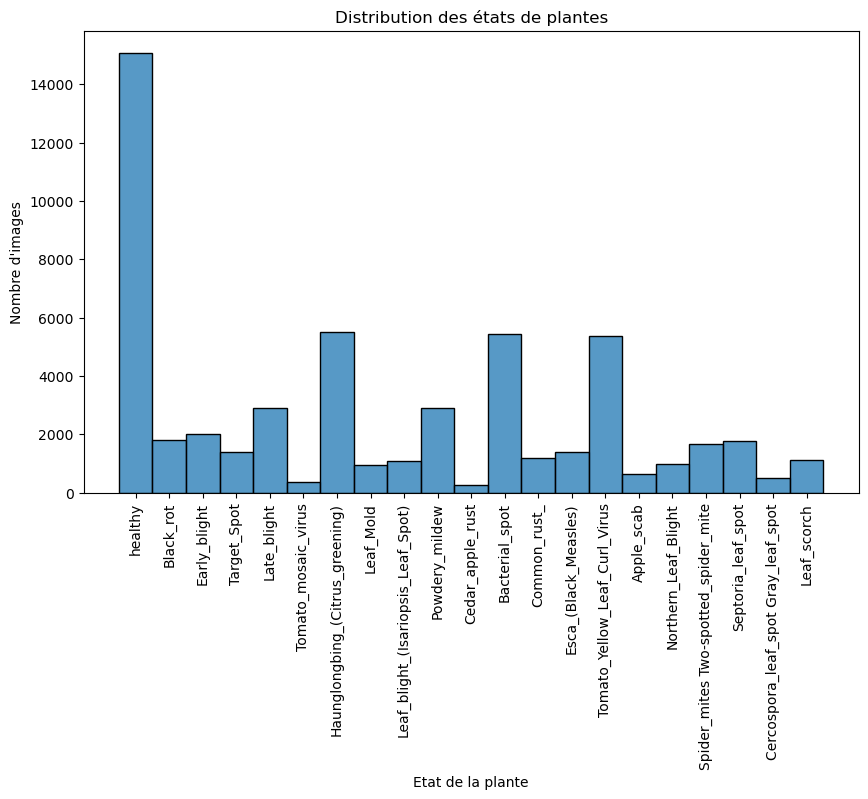

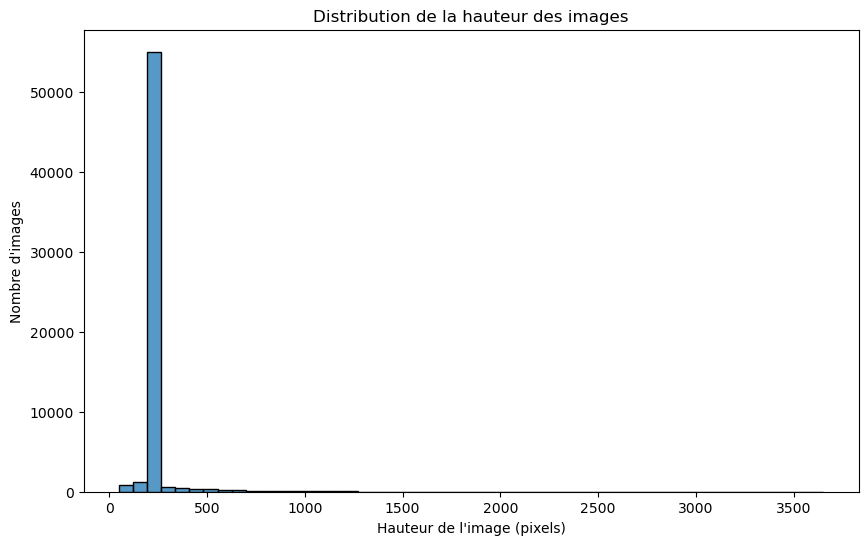

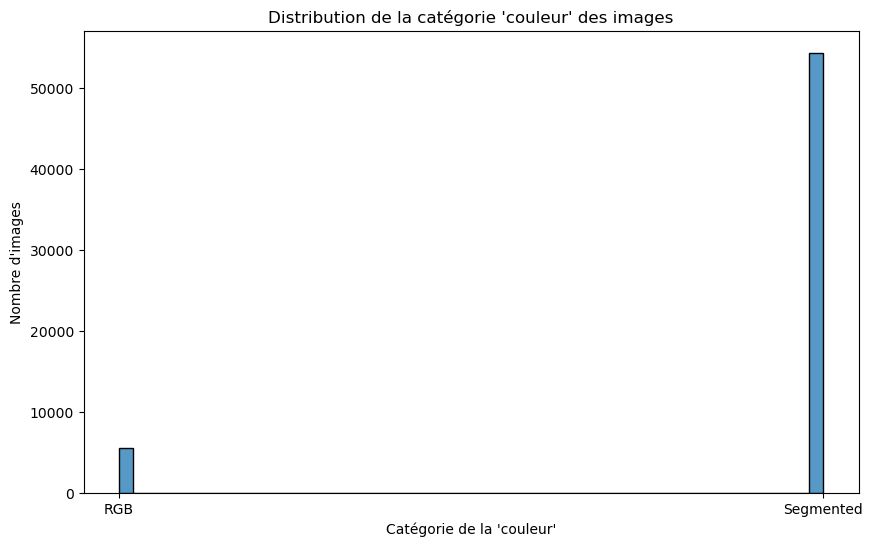

Pourcentage de plantes de type 'Tomato' : 30.35 %

Pourcentage de plantes dont l'état est 'healthy' : 25.21 %
Pourcentage de plantes dont l'état est 'unhealthy' : 65.54 %
Pourcentage de plantes dont l'état est 'NaN' : 9.26 %


In [6]:
# Visualisation de la distribution des espèces de plantes au niveau du DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df['espèce'])
plt.title("Distribution des espèces de plantes")
plt.xlabel("Espèce de la plante")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=90)
plt.show()

# Visualisation de la distribution des états de plantes au niveau du DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df['état'])
plt.title("Distribution des états de plantes")
plt.xlabel("Etat de la plante")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=90)
plt.show()

# Visualisation de la distribution des hauteurs des images au niveau du DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df['hauteur'], bins=50)
plt.title("Distribution de la hauteur des images")
plt.xlabel("Hauteur de l'image (pixels)")
plt.ylabel("Nombre d'images")
plt.show()

# Visualisation de la distribution de la catégorie 'couleur' des images au niveau du DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df['couleur'], bins=50)
plt.title("Distribution de la catégorie 'couleur' des images")
plt.xlabel("Catégorie de la 'couleur'")
plt.xticks([0, 1], ['RGB', 'Segmented'])
plt.ylabel("Nombre d'images")
plt.show()


### Analyse des graphiques ###

# Calcul de la proportion représentant l'espèce 'Tomato' au niveau du DataFrame
valeurs_tomate = (df['espèce'] == 'Tomato').sum()
valeurs_tomate_pourcent = round((valeurs_tomate / len(df)) * 100, 2)
print("Pourcentage de plantes de type 'Tomato' :", valeurs_tomate_pourcent, "%\n")

# Calcul de la proportion représentant l'état 'healthy' au niveau du DataFrame
valeurs_healthy = (df['état'] == 'healthy').sum()
valeurs_healthy_pourcent = round((valeurs_healthy / len(df)) * 100, 2)
print("Pourcentage de plantes dont l'état est 'healthy' :", valeurs_healthy_pourcent, "%")

# Calcul de la proportion représentant l'état 'unhealthy' au niveau du DataFrame (différent de 'healthy' et NaN)
valeurs_unhealthy = ((df['état'] != 'healthy') & (~df['état'].isna())).sum()
valeurs_unhealthy_pourcent = round((valeurs_unhealthy / len(df)) * 100, 2)
print("Pourcentage de plantes dont l'état est 'unhealthy' :", valeurs_unhealthy_pourcent, "%")

# Calcul de la proportion représentant l'état 'NaN' au niveau du DataFrame
valeurs_nan = df['état'].isna().sum()
valeurs_nan_pourcent = round((valeurs_nan / len(df)) * 100, 2)
print("Pourcentage de plantes dont l'état est 'NaN' :", valeurs_nan_pourcent, "%")

Analyse des graphiques :
- Distribution des espèces de plantes :

Observation(s) : La catégorie "Tomato" est nettement surreprésentée (30.35%) par rapport aux autres espèces. Cela peut entraîner un déséquilibre dans notre modèle de classification, car il sera davantage biaisé vers cette catégorie.

Action(s) possible(s) : Application d'un sous-échantillonnage de "Tomato" pour équilibrer les données et pour réduire le biais dans le modèle de classification. L’application d’un suréchantillonnage serait plus complexe à mettre en œuvre, car il impliquerait de générer artificiellement des données pour de nombreuses classes sous-représentées, ce qui augmenterait la complexité et le risque de biais. En revanche, le sous-échantillonnage est ici une solution plus simple, puisqu’il ne concerne qu’une seule classe sur-représentée. Bien que cette méthode entraîne une perte d’information, cela reste acceptable compte tenu de la taille conséquente de notre échantillon d’images, qui garantit une diversité suffisante pour entraîner le modèle de manière efficace.

- Distribution des états des plantes :

Observation(s) : Environ 25,21 % des plantes sont dans l'état "healthy", tandis que 65,54 % sont atteintes de maladies et 9,26 % présentent des valeurs manquantes. Même si l'état "healthy" a une part importante, il y a une majorité d'exemples malades, ce qui est utile pour entraîner un modèle capable de détecter la présence de maladies sur les plantes. En ce qui concerne les valeurs manquantes, celles-ci restent significatives et pourraient avoir un impact sur la qualité des prédictions si elles ne sont pas traitées.

Action(s) possible(s) : Nous avons décidé d'utiliser le premier dataset uniquement pour l'entraînement des modèles de détection des espèces de plantes. Par conséquent, les valeurs manquantes n'auront aucun impact lors de l'entraînement des modèles pour la détection des maladies, puisque cette étape se concentrera exclusivement sur le second dataset.

- Distribution de la hauteur des images :

Observation(s) : La majorité des images ont une hauteur inférieure à 500 pixels, mais des valeurs extrêmes allant jusqu'à 3600 pixels sont présentes.

Action(s) possible(s) : Redimensionnement des images à une taille standard (par exemple 224x224) pour améliorer la cohérence des entrées.

- Distribution de la Catégorie "couleur" des images (RGB vs Segmented) :

Observation(s) : La majorité des images sont segmentées, tandis qu'une petite fraction est en format RGB (correspondante au DataSet V2 Plant Seedlings), ce qui pourrait affecter la classification.

Action(s) possible(s) : Conversion de toutes les images dans un même format segmenté (avec fond noir uni) pour améliorer la cohérence des entrées.

# Étape 2 - Pre-processing et feature engineering

Dans cette partie, nous allons appliquer différentes méthodes afin de répondre aux conclusions tirées précédemment :   
- Redimensionner les images à une taille standard pour faciliter l'entraînement des modèles.
- Convertir toutes les images au même format pour garantir la cohérence des entrées (application d'un masque vert pour supprimer le fond des images RGB).
- Combler les valeurs manquantes de la catégorie 'état'. Hypothèses : Le dataset des semis ne contient que des plantes saines. 
- Appliquer un sous-échantillonnage à la classe 'Tomato' pour équilibrer les classes.

In [7]:
### Définition des fonctions ### 

# Fonction pour importer et convertir une image au format classique (0-255)
def import_image(image_path):
    # Importation de l'image
    img = plt.imread(image_path)
    
    # Conversion du type png (0-1) en classique (0-255)
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
    
    return img

# Fonction pour redimensionner une image à la taille standard 224x224
def resize_image(img, size=(224, 224)):
   
    img_resized = cv2.resize(img, size)

    return img_resized

# Fonction pour appliquer un masque vert et convertir les images RGB au format segmenter (fond noir)
def create_green_mask(img, green_threshold=(90, 10, 90)):
    
    # Isoler les pixels du filtre vert
    green_mask = (img[:,:,1] > img[:,:,0]) & (img[:,:,1] > img[:,:,2])
    
    # Seuil pour vert
    green_mask = green_mask & (img[:,:,1] > green_threshold[1])
    
    # Seuil pour rouge et jaune
    green_mask = green_mask & (img[:,:,0] < green_threshold[0]) & (img[:,:,2] < green_threshold[2])
    
    # Application du masque + négatif
    masked_img = img.copy()
    if img.shape[2] == 3 : 
        masked_img[~green_mask] = [0, 0, 0]
    elif img.shape[2] == 4 :
        masked_img[~green_mask] = [0, 0, 0, 255]
    
    return green_mask, masked_img

# Fonction pour sous-échantillonner la classe "Tomato" qui est sur-représentée
def downsample_majority_classe(df):
    from sklearn.utils import resample
    
    # Séparation de la classe majoritaire (Tomato) et des autres classes
    df_majority = df[df['espèce'] == 'Tomato']
    df_minority = df[df['espèce'] != 'Tomato']
    
    # Définition de la taille cible comme celle de la classe minoritaire la plus grande
    target_size = df_minority['espèce'].value_counts().max()
    
    # Sous-échantillonner la classe majoritaire
    df_majority_downsampled = resample(df_majority, 
                                       replace=False,           # Échantillonnage sans remise
                                       n_samples=target_size,   # Réduire à la taille cible
                                       random_state=42)         # Pour la reproductibilité
    
    # Fusion de la classe majoritaire sous-échantillonnée et des autres classes
    df_equilibre = pd.concat([df_majority_downsampled, df_minority])
    
    return df_equilibre

# Fonction pour afficher les résultats du process
def display_image_results(img_resized, green_mask, masked_img):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(img_resized)
    ax1.set_title('Image redimensionnée')
    ax2.imshow(green_mask, cmap='gray')
    ax2.set_title('Masque')
    ax3.imshow(masked_img)
    ax3.set_title('Image masquée')
    plt.tight_layout()
    plt.show()

# Fonction pour appliquer le process complet
def process_images(image_paths, output_path, size=(224, 224), green_threshold=(90, 10, 90), df=df):
    
    for i, image_path in enumerate(image_paths):
        print(f"Processing image {i+1}/{len(image_paths)}: {image_path}")
        
        # Étape 1: Importation de l'image
        img = import_image(image_path)
        
        # Étape 2: Redimensionnement de l'image
        img_resized = resize_image(img, size=size)

        # Mise à jour de la hauteur et largeur dans le DataFrame
        df.loc[df['chemin'] == image_path, 'hauteur'] = size[0]
        df.loc[df['chemin'] == image_path, 'largeur'] = size[1]
        
        # Étape 3: Application du masque vert et convertir les images RGB au format segmenter (fond noir)
        # Dans le cas du DataSet avec uniquement les semis https://www.kaggle.com/datasets/vbookshelf/v2-plant-seedlings-dataset, on applique le masque vert pour convertir les images RGB en segmented
        if '\data\semis' in image_path :
            green_mask, masked_img = create_green_mask(img_resized, green_threshold=green_threshold)
            
            # Mise à jour de la colonne 'couleur' pour l'image segmentée
            df.loc[df['chemin'] == image_path, 'couleur'] = 1
            
            # Sauvegarde des résultats
            #plt.imsave(f"{output_path}/image_{i+1}_resized.png", img_resized)
            #plt.imsave(f"{output_path}/image_{i+1}_mask.png", green_mask, cmap='gray')
            plt.imsave(f"{output_path}/image_{i+1}_masked.png", masked_img)
      
        # Dans le cas du DataSet https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset, les images sont déjà segmentées
        else : 
          # Sauvegarde des résultats
          plt.imsave(f"{output_path}/image_{i+1}_masked.png", img_resized)


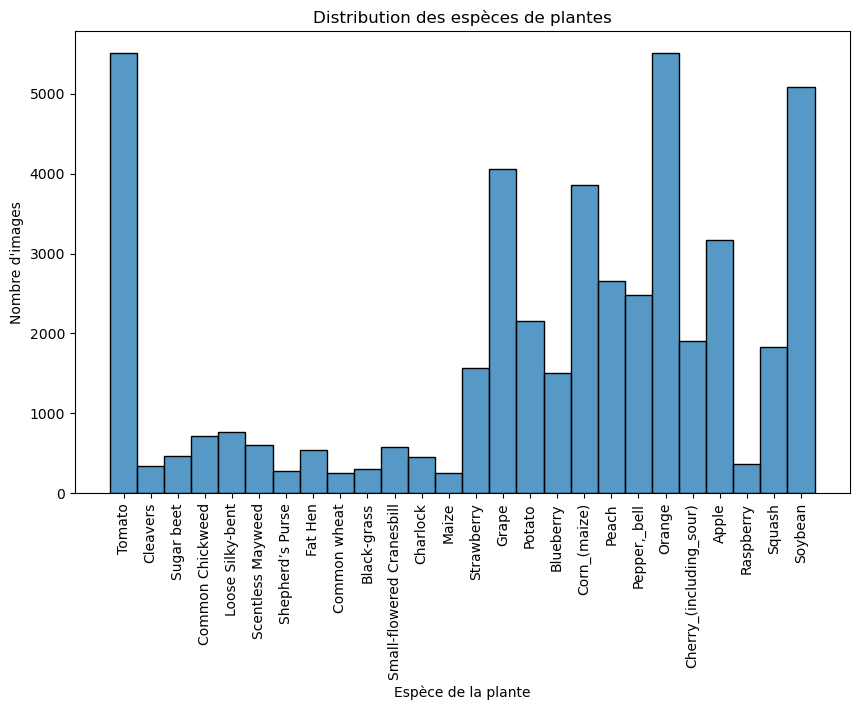

In [8]:
### Application ###

# Appliquer le sous-échantillonnage pour équilibrer les classes
df_equilibre = downsample_majority_classe(df)

# Visualisation de la distribution des espèces de plantes au niveau du DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df_equilibre['espèce'])
plt.title("Distribution des espèces de plantes")
plt.xlabel("Espèce de la plante")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=90)
plt.show()


In [11]:
# Appliquer le traitement des images

# Définition du dossier de sortie des images
output_dir = project_dir / "data" / "output_images_resample"

# Corrections des chemins dans df_equilibre pour pointer vers 'data' au lieu de './'
df_equilibre["chemin"] = df_equilibre["chemin"].apply(lambda x: str(project_dir / x.replace('./', 'data/')))

# Création de la liste des chemins d'images
image_paths = df_equilibre["chemin"].tolist()

# Identification d'une image noire dans le DataSet "PlantVillage" à supprimer avant traitement des images
image_to_remove = str(project_dir / 'data/plantdisease/Soybean___healthy/b32e4516-9cd7-4226-be52-26f413c97834___RS_HL 3512_final_masked.jpg')
image_paths.remove(image_to_remove)



#### À décommenter pour appliquer le masque vert

In [ ]:
#à décommenter pour process les images
#process_images(image_paths, output_path=output_dir, size=(224, 224), green_threshold=(90, 10, 90), df=df_equilibre)

# Étape 3 - Modélisation

### Préparation des données pour la modélisation

Avant de se lancer dans les tests de différents modèles, nous devons préparer nos données pour qu'elles soient adaptées à l'entraînement :
- Les colonnes espèce et état contiennent des variables catégorielles. Afin qu'elles soient interprétées correctement par le modèle, elles doivent être transformées en valeurs numériques (encodage).
- Les données seront ensuite divisées en deux ensembles distincts : un ensemble d'entraînement pour apprendre les caractéristiques des données, et un ensemble de test pour évaluer les performances du modèle.
- Enfin, les dimensions des images seront normalisées afin d'améliorer la stabilité et l'efficacité de l'entraînement des modèles.

### Encodage des données d'espèces pour le premier modèle

In [12]:
espece = pd.get_dummies(df_equilibre.espèce,prefix='espece')
df_encod = pd.concat([df_equilibre,espece],axis=1)
df_encod = df_encod.drop('espèce',axis=1)
df_encod.head()

chemin  hauteur  largeur  \
33373  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
33256  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
14388  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
38923  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
36079  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   

       couleur                           état  espece_Apple  \
33373      1.0                        healthy             0   
33256      1.0                        healthy             0   
14388      1.0                    Late_blight             0   
38923      1.0  Tomato_Yellow_Leaf_Curl_Virus             0   
36079      1.0  Tomato_Yellow_Leaf_Curl_Virus             0   

       espece_Black-grass  espece_Blueberry  espece_Charlock  \
33373                   0                 0                0   
33256                   0                 0                0   
14388                   0                 0                0   
38923                   0                 0                0   
36079                   0                 0                0   

       espece_Cherry_(including_sour)  ...  espece_Potato  espece_Raspberry  \
33373                               0  ...              0                 0   
33256                               0  ...              0                 0   
14388                               0  ...              0                 0   
38923                               0  ...              0                 0   
36079                               0  ...              0                 0   

       espece_Scentless Mayweed  espece_Shepherd’s Purse  \
33373                         0                        0   
33256                         0                        0   
14388                         0                        0   
38923                         0                        0   
36079                         0                        0   

       espece_Small-flowered Cranesbill  espece_Soybean  espece_Squash  \
33373                                 0               0              0   
33256                                 0               0              0   
14388                                 0               0              0   
38923                                 0               0              0   
36079                                 0               0              0   

       espece_Strawberry  espece_Sugar beet  espece_Tomato  
33373                  0                  0              1  
33256                  0                  0              1  
14388                  0                  0              1  
38923                  0                  0              1  
36079                  0                  0              1  

[5 rows x 31 columns]

### Suppression de la colonne 'état' pour détermination de l'espèce uniquement

In [13]:
df_encod_espece = df_encod.drop('état',axis=1)
df_encod_espece.head()

chemin  hauteur  largeur  \
33373  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
33256  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
14388  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
38923  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   
36079  /Users/clara/Desktop/project-plantes-main - ZI...      256      256   

       couleur  espece_Apple  espece_Black-grass  espece_Blueberry  \
33373      1.0             0                   0                 0   
33256      1.0             0                   0                 0   
14388      1.0             0                   0                 0   
38923      1.0             0                   0                 0   
36079      1.0             0                   0                 0   

       espece_Charlock  espece_Cherry_(including_sour)  espece_Cleavers  ...  \
33373                0                               0                0  ...   
33256                0                               0                0  ...   
14388                0                               0                0  ...   
38923                0                               0                0  ...   
36079                0                               0                0  ...   

       espece_Potato  espece_Raspberry  espece_Scentless Mayweed  \
33373              0                 0                         0   
33256              0                 0                         0   
14388              0                 0                         0   
38923              0                 0                         0   
36079              0                 0                         0   

       espece_Shepherd’s Purse  espece_Small-flowered Cranesbill  \
33373                        0                                 0   
33256                        0                                 0   
14388                        0                                 0   
38923                        0                                 0   
36079                        0                                 0   

       espece_Soybean  espece_Squash  espece_Strawberry  espece_Sugar beet  \
33373               0              0                  0                  0   
33256               0              0                  0                  0   
14388               0              0                  0                  0   
38923               0              0                  0                  0   
36079               0              0                  0                  0   

       espece_Tomato  
33373              1  
33256              1  
14388              1  
38923              1  
36079              1  

[5 rows x 30 columns]

### Séparation des données

In [18]:
# Définition du dossier de sortie des images
image_list_path = os.listdir(output_dir)

print(image_list_path[0])
image_liste_path_fold = []
for n in range(len(image_list_path)):
    image_liste_path_fold.append(project_dir / output_dir / image_list_path[n])

#image_liste_path_fold.remove('./output_images_resample/image_197_masked.png')
print(image_liste_path_fold[2391])

image_42545_masked.png
/Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_36643_masked.png


In [19]:
images_list = []
for i, image_path in enumerate(image_liste_path_fold):
        print(f"Processing image {i+1}/{len(image_liste_path_fold)}: {image_path}")
        
        # Étape 1: Importation de l'image
        img = import_image(image_path)
        if img.shape[2] == 3 : 
                images_list.append(img)
        elif img.shape[2] == 4 : 
                img = img[:, :, :3]
                images_list.append(img)

print(len(images_list))

Processing image 1/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_42545_masked.png
Processing image 2/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_31882_masked.png
Processing image 3/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_30610_masked.png
Processing image 4/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_43759_masked.png
Processing image 5/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_7227_masked.png
Processing image 6/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_45380_masked.png
Processing image 7/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_10537_masked.png
Processing image 8/47191: /Users/clara/Desktop/project-plantes-main - ZIP/data/output_images_resample/image_26730_masked.png
P

In [20]:
images_list_reshape = np.array(images_list).reshape([-1, 224,224,3])
print(images_list_reshape.shape)

(47191, 224, 224, 3)


In [24]:
path_removed = str(project_dir / 'data/plantdisease/Soybean___healthy/b32e4516-9cd7-4226-be52-26f413c97834___RS_HL 3512_final_masked.jpg')
df_encod_espece = df_encod_espece.drop(df_encod_espece[df_encod_espece['chemin']==path_removed].index)

In [25]:
X = images_list_reshape
y = df_encod_espece.drop(['chemin','hauteur','largeur','couleur'],axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)